# Linking tree to alignment and visualization

Two categories of tree objects can be linked to aligments

In [1]:
from ete3 import PhyloTree, EvolTree

In [2]:
wanted = '933801.Ahos_17051'

## PhyloTree

We load the tree as a PhyloTree

In [3]:
tree = PhyloTree('data/evol/{0}/mafft_default-trimal00-none-fasttree_default/{0}.faa.final_tree.nw'.format(
    wanted))

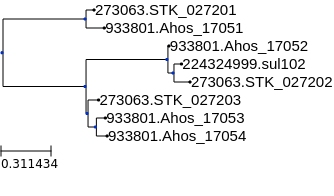

In [4]:
tree.render('%%inline')

Link to the alignment file, leaf names must match FASTA entries

In [5]:
tree.link_to_alignment('data/evol/{0}/mafft_default-trimal00-none-fasttree_default/{0}.faa.final_tree.fa'.format(wanted))

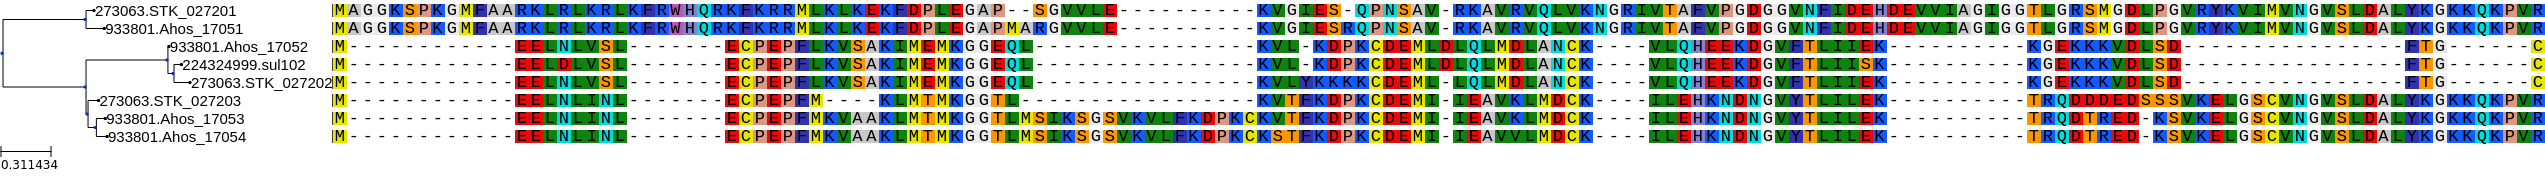

In [6]:
tree.render('%%inline')

We can do the same with the nucleotide sequence:

In [7]:
tree.link_to_alignment('data/evol/{0}/mafft_default-trimal00-none-fasttree_default/{0}.faa.final_tree.used_alg.fa'.format(wanted))

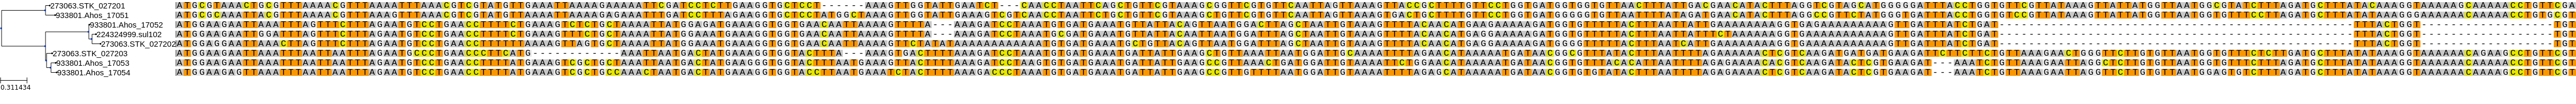

In [8]:
tree.render('%%inline')

## EvolTree

We do the same with EvolTree instead of PhyloTree. These trees are designed to work with codons

In [9]:
tree = EvolTree('data/evol/{0}/mafft_default-trimal00-none-fasttree_default/{0}.faa.final_tree.nw'.format(
    wanted))

As before we load nucleotide

In [10]:
tree.link_to_alignment('data/evol/{0}/mafft_default-trimal00-none-fasttree_default/{0}.faa.final_tree.used_alg.fa'.format(wanted))

This time we obtain AA sequences..

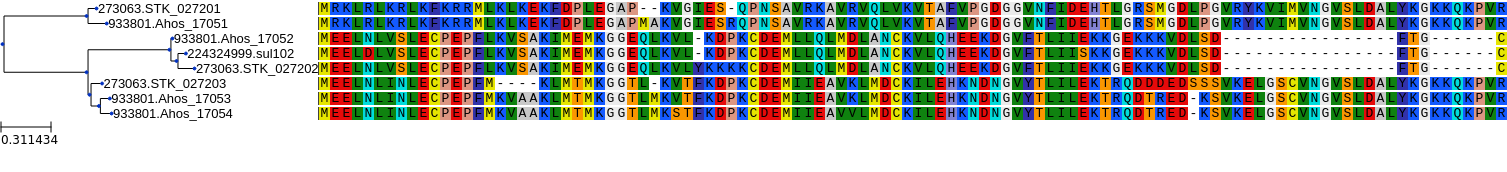

In [11]:
tree.render('%%inline')

that are indeed cdons...

In [12]:
tree.show()

# Tune the alignment

In [13]:
from ete3 import faces, TreeStyle, SequenceFace

In [14]:
def layout_long_ali(node):
    if node.is_leaf() and hasattr(node, "sequence"):
        seqface =  SequenceFace(node.sequence, "aa",
                                fsize=10, special_col=[[10,50],[81, 97]],
                                alt_col_w=3, col_w=11, interactive=True)
        faces.add_face_to_node(seqface, node, 1, aligned=True)

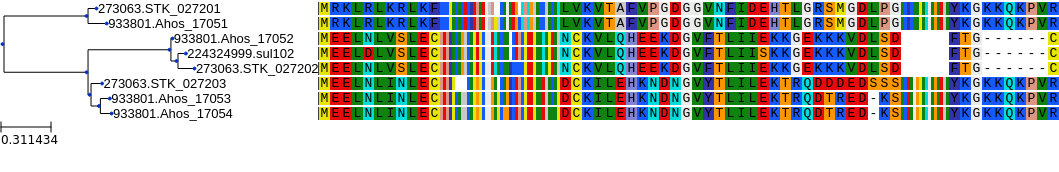

In [15]:
ts = TreeStyle()
ts.show_leaf_name = True
ts.layout_fn = layout_long_ali
tree.render('%%inline', tree_style=ts)

In [17]:
tree.show(tree_style=ts)